In [6]:
import numpy as np
import h5py
from matplotlib import pyplot as plt

In [30]:
from keras.layers import *
from keras.models import *
from keras import optimizers

In [12]:
def load_train_dataset(path='datasets/train_signs.h5', preview=5):
    train_dataset = h5py.File(path, 'r')
    
    train_x = np.array(train_dataset['train_set_x'])
    train_y = np.array(train_dataset['train_set_y'])
    classes = np.array(train_dataset['list_classes'])

    print("train_x size: {}".format(train_x.shape))
    print("train_y size: {}".format(train_y.shape))
    print(classes)

    for i in range(0, preview):
        index = np.random.randint(train_x.shape[0])
        plt.figure()
        plt.suptitle(train_y[index])
        plt.imshow(train_x[index])

    return train_x, train_y, len(classes)

In [25]:
def load_test_dataset(path='datasets/test_signs.h5'):
    test_dataset = h5py.File(path, 'r')
    
    test_x = np.array(test_dataset['test_set_x'])
    test_y = np.array(test_dataset['test_set_y'])

    return test_x, test_y

In [ ]:
def one_hot(y, C):
    y_one_hot = np.zeros((y.shape[0], C))
    y_one_hot[np.arange(0, y.shape[0]), y] = 1
    
    return y_one_hot

train_x size: (1080, 64, 64, 3)
train_y size: (1080,)
[0 1 2 3 4 5]


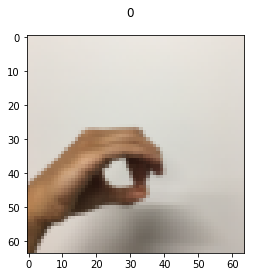

In [15]:
tix, tiy, C = load_train_dataset(preview=1)

In [16]:
tix = tix/255

In [ ]:
tiy = one_hot(tiy, C)

In [27]:
test_x, test_y = load_test_dataset()

In [28]:
test_x = test_x/255
test_y = one_hot(test_y, C)

In [31]:
def build_model(image_shape, c):
    x_input = Input(image_shape)
    
    x = ZeroPadding2D(padding=(1,1))(x_input)
    x = Conv2D(32, (3, 3), strides=(1, 1))(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    
    x = MaxPool2D((2,2))(x)

    x = ZeroPadding2D(padding=(1,1))(x_input)
    x = Conv2D(64, (3, 3), strides=(1, 1))(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    
    x = MaxPool2D((2,2))(x)

    x = ZeroPadding2D(padding=(1,1))(x_input)
    x = Conv2D(16, (3, 3), strides=(1, 1))(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    
    x = Flatten()(x)
    
    x = Dropout(rate=0.1)(x)
    x = Dense(units =1024, activation='relu')(x)
    x = Dense(c, activation='softmax')(x)
    
    return Model(inputs = x_input, outputs=x, name='sign_cnn')
    
    